In [10]:
import pandas as pd
import numpy as np

In [11]:
dataset = pd.read_csv('../input/breast-cancer-wisconsin-data/data.csv')

In [12]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [13]:
dataset.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [14]:
dataset.shape

(569, 33)

In [15]:
dataset['diagnosis']=np.where(dataset['diagnosis']=='M',1,0)

In [17]:
X=dataset.iloc[:, 2:-1].values
y=dataset.iloc[:, 1].values

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [19]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [20]:
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

Creating Model with Pytorch

In [48]:
class ANN_Model(nn.Module):
    def __init__(self,input_features=30,hidden1=100,hidden2=100,out_features=2):
        super().__init__()
        self.f_connected1=nn.Linear(input_features,hidden1)
        self.f_connected2=nn.Linear(hidden1,hidden2)
        self.out=nn.Linear(hidden2,out_features)
    def forward(self,x):
        x=F.relu(self.f_connected1(x))
        x=F.relu(self.f_connected2(x))
        x=self.out(x)
        return x

In [49]:
torch.manual_seed(20)
model=ANN_Model()

In [50]:
loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [51]:
epochs=500
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model.forward(X_train)
    loss=loss_function(y_pred,y_train)
    final_losses.append(loss)
    if i%10==1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 and the loss : 9.763959884643555
Epoch number: 11 and the loss : 0.6903238892555237
Epoch number: 21 and the loss : 0.6612697243690491
Epoch number: 31 and the loss : 0.6522195935249329
Epoch number: 41 and the loss : 0.6221506595611572
Epoch number: 51 and the loss : 0.579852819442749
Epoch number: 61 and the loss : 0.47451677918434143
Epoch number: 71 and the loss : 0.4100389778614044
Epoch number: 81 and the loss : 0.3543786406517029
Epoch number: 91 and the loss : 0.3330771327018738
Epoch number: 101 and the loss : 0.3133615553379059
Epoch number: 111 and the loss : 0.29630711674690247
Epoch number: 121 and the loss : 0.28219008445739746
Epoch number: 131 and the loss : 0.26968321204185486
Epoch number: 141 and the loss : 0.25883421301841736
Epoch number: 151 and the loss : 0.24895061552524567
Epoch number: 161 and the loss : 0.2398114651441574
Epoch number: 171 and the loss : 0.23162201046943665
Epoch number: 181 and the loss : 0.22428588569164276
Epoch number: 191

Text(0.5, 0, 'Epoch')

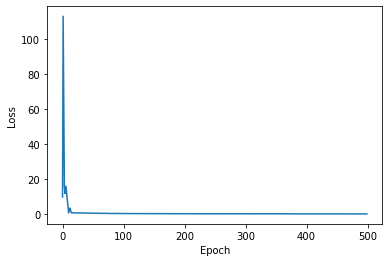

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(epochs),final_losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [53]:
predictions=[]
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred=model(data)
        predictions.append(y_pred.argmax().item())
        print(y_pred.argmax().item())

1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
1
1
1
1
1
0
0
1
0
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
0
1
0
0
1
0
0
0
1
1
0
1
0
0
0
0
0
0
1
1
1
0
0
1
0
1
1
1
0
0
1
0
0
1
0
0
0
0
0
1
1
1
0
1
0
0
0
1
1
0
1
1
1
0
0
1
0
0
0
0
0
0
0
1
0
1
0
1
1
0
1
1
0


In [54]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
cm

array([[65,  2],
       [ 2, 45]])

In [55]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,predictions)
score

0.9649122807017544